In [0]:
from keras.datasets import imdb 
import numpy as np

In [0]:
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(xT, yT), (xt, yt) = imdb.load_data(num_words=3000)

# restore np.load for future normal usage
np.load = np_load_old

del np_load_old

In [15]:
word2idx = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
idx2word = dict([(v,k) for k,v in word2idx.items()])

In [22]:
print(len(list(word2idx.items())))
print(list(word2idx.items())[0])

88584
('fawn', 34701)


In [31]:
review = ' '.join(idx2word.get(idx-3 ,"?") for idx in xT[3])
print(review)

? the ? ? at storytelling the traditional sort many years after the event i can still see in my ? eye an ? lady my ? mother ? the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? ? a ? or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in ? the length and ? of ? as i ? it with a friend one night in ? a local cut in to give his version the ? ? to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction ? with ? role ? warning stories ? magic and mystery br br my name is ? like my ? and his ? before him our protagonist ? himself to us and also ? the story that ? back through ? it ? stories within storie

In [0]:
from keras.preprocessing import sequence

In [35]:
x_train = sequence.pad_sequences(xT , maxlen = 500)
x_text = sequence.pad_sequences(xT , maxlen = 500)
print(x_train.shape , x_text.shape)

(25000, 500) (25000, 500)


In [0]:
# Model Architecture

In [0]:
from keras.layers import Dense , SimpleRNN , Embedding
from keras.models import Sequential

In [43]:
model = Sequential()
model.add(Embedding(5000 , 20))
model.add(SimpleRNN(32))
model.add(Dense(1,activation = "sigmoid"))
model.summary()

W0812 17:06:31.420817 140464692623232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 17:06:31.437232 140464692623232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 20)          100000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                1696      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 101,729
Trainable params: 101,729
Non-trainable params: 0
_________________________________________________________________


## Training the **Model**

In [0]:
model.compile(optimizer = "rmsprop" , loss="binary_crossentropy",metrics=["acc"])

In [48]:
hist = model.fit(x_train,yT,validation_split=0.2,epochs=10,batch_size=128)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 17s 828us/step - loss: 0.2893 - acc: 0.8858 - val_loss: 0.3746 - val_acc: 0.8396
Epoch 2/10
20000/20000 [==============================] - 16s 792us/step - loss: 0.2576 - acc: 0.8985 - val_loss: 0.3628 - val_acc: 0.8582
Epoch 3/10
20000/20000 [==============================] - 16s 803us/step - loss: 0.2349 - acc: 0.9082 - val_loss: 0.3747 - val_acc: 0.8612
Epoch 4/10
20000/20000 [==============================] - 16s 793us/step - loss: 0.2156 - acc: 0.9199 - val_loss: 0.4360 - val_acc: 0.8270
Epoch 5/10
20000/20000 [==============================] - 16s 791us/step - loss: 0.1988 - acc: 0.9236 - val_loss: 0.4831 - val_acc: 0.8332
Epoch 6/10
20000/20000 [==============================] - 16s 789us/step - loss: 0.1910 - acc: 0.9259 - val_loss: 0.4201 - val_acc: 0.8486
Epoch 7/10
20000/20000 [==============================] - 16s 787us/step - loss: 0.1683 - acc: 0.9392 - val_loss: 0.4

In [54]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
hist1 = hist.history

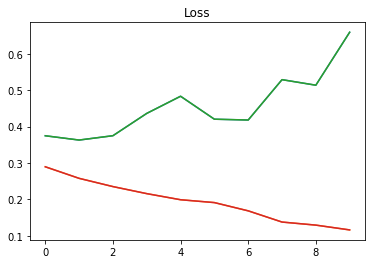

In [57]:
import matplotlib.pyplot as plt
plt.title("Loss")
plt.plot(hist1["val_loss"],label="Testing")
plt.plot(hist1["loss"],label="Training")
plt.title("Loss")
plt.plot(hist1["val_loss"],label="Testing")
plt.plot(hist1["loss"],label="Training")

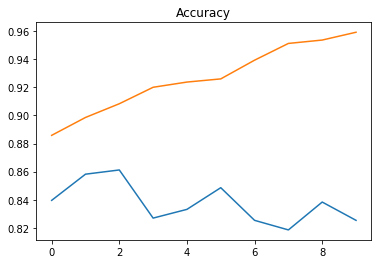

In [59]:
plt.title("Accuracy")
plt.plot(hist1["val_acc"],label="Testing")
plt.plot(hist1["acc"],label="Training")